<div align="center">

**Lab Report Title**  
*Field Effect Transistor Applications*

**Course:** ELECTRONICS 2 

**Date:** 11/06/2025


**Group Members**

| Full Name                 | Matriculation No. |
| ------------------------- | ----------------- |
| Ashu Nkongho Tekoh        | 2756129           |
| Enes Gjana                | 2770615           |
| Elhama Adel               | 2756781           |


</div>

In [307]:
#Load all Import

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Introduction and Objective

During this soldering exercise, a voltage regulator with an operational amplifier and additional
components is to be assembled on a perforated board in Eurocard format.



# Preparation

## Part 1: Differential Amplifier 
**Objective:** Record transfer characteristics of a differential amplifier, determine the offset voltage and transconductance.

1. **Calculation of the emitter resistance RE for the given OP.**  
   $$RE = \frac{U_B-U_{\rm BE0}}{2*I_{\rm CO}} = \frac{9.35\text{ V}}{2\text{ mA}} = {4675\;\Omega}.$$

2. **Calculation of the Collector resistance RC.**  
   - This was not required in the preperation but the differential amplifier can not work without RC as the circuit provided had no RC.
   - The OP was assumed at $U_{B}$/2.
   $$U_{\rm OUT0} = \frac{U_B}{2} = {5\text{V}}.$$
   $$RC = \frac{U_B-U_{\rm OUT0}}{I_{\rm CO}} = \frac{5\text{ V}}{1\text{ mA}} = {5000\;\Omega}.$$
  
3. **Simulation action (See Calculation under Data Processing)**  
   - Build the differential amplifier circuit in SPICE / LT-Spice. 
   - Perform the DC sweep of $U_{IN1}$ from -0.15V to 0.15V. 
   - Plot $U_{OUT1}$ and $U_{OUT2}$.  
   - Observe the transfer characteristics..  

  
   
   

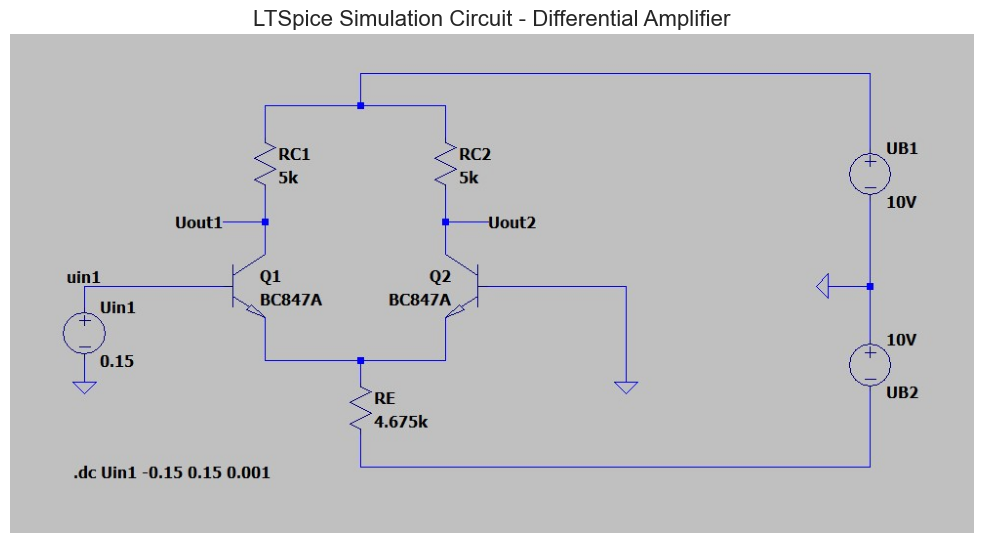

In [308]:
from components.data_visualizing import insert_circut_diagram

# change to TRUE is we have Simulation Circuit Image
# Provide to the image folder, change the name to match

IS_LTSPICE_CIRCUIT_AVAILABLE = True
img_path = '../images/lab3_task1.jpg'  # change string to name of LTspice image
img_title = "LTSpice Simulation Circuit - Differential Amplifier" # Enter Image Title Here

if IS_LTSPICE_CIRCUIT_AVAILABLE:
    insert_circut_diagram(img_path=img_path,img_title=img_title)

In [309]:
from components.data_import import import_measurement_data, import_simulation_data
from components.data_processing import process_sim_data,process_single_csv
import pandas as pd
# Use the code below if we want to read single .csv files
# Pull a .csv and .txt files in the data folder

IS_DATA_AVAILABLE = True
simulation_data_path = "../data/Prep_Data/diffamp_standard_transfer_characteristics.txt" # Enter path to simulation data
#part_2_data_path = "../data/Prep_Data/Mosfet_Current_Mirror.txt" # Enter path to simulation data
#oscilloscope_data_path_ch1 = "../data/tek0001CH1.csv" # Enter path to chanel 1 oscilloscope data
#oscilloscope_data_path_ch2 = "../data/tek0001CH2.csv" # Enter path to chanel 2 osilloscope data


cleaned_sim_data = pd.DataFrame()
cleaned_ch1_data = pd.DataFrame()
cleaned_ch2_data = pd.DataFrame()

part_2_data = pd.DataFrame()

if IS_DATA_AVAILABLE:
    sim_data = import_simulation_data(simulation_data_path)
    #data_2 = import_simulation_data(part_2_data_path)
    #ch1_data = import_measurement_data(oscilloscope_data_path_ch1)
    #ch2_data = import_measurement_data(oscilloscope_data_path_ch2)
    
    # Processing the data

    #cleaned_sim_data = process_sim_data (sim_data)
    #part_2_data = process_sim_data (data_2)
    #cleaned_ch1_data = process_single_csv(ch1_data)
    #cleaned_ch2_data =process_single_csv(ch2_data)

[ 11-06-2025, 21:03:42 ] 20 root - INFO - Successfully imported simulation data from ../data/Prep_Data/diffamp_standard_transfer_characteristics.txt


,uin1,V(uout1),V(uout2),abs(D(V(uout1)-V(uout2))/D(uin1))
0,-0.150,9.966732,0.112030,2.573565
1,-0.149,9.965443,0.113314,2.675440
2,-0.148,9.964051,0.114700,2.805822
3,-0.147,9.962631,0.116114,2.890255
4,-0.146,9.961155,0.117584,3.003672


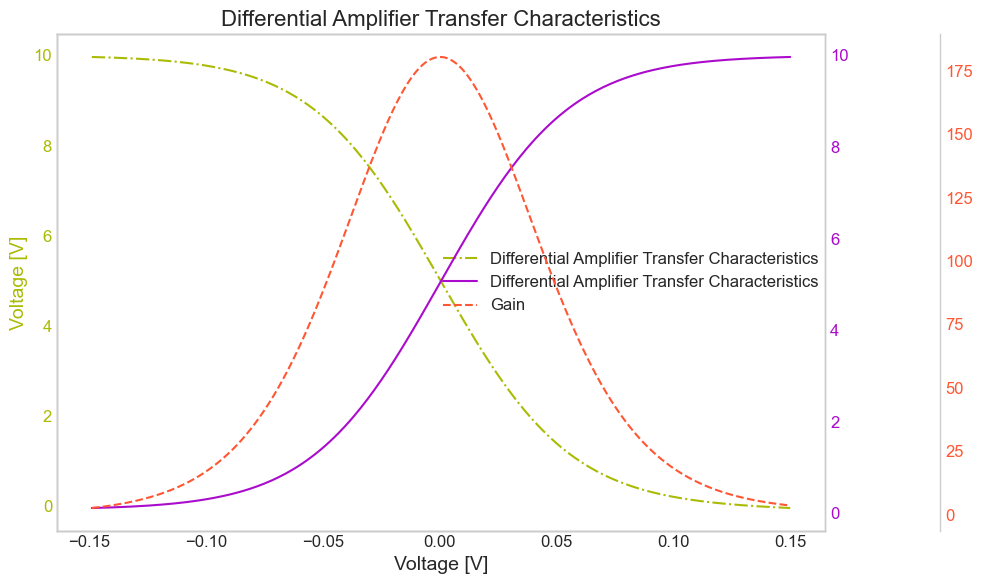

In [310]:
# Plotting multiple data
from components.data_visualizing import plot_multiple_sim_data_2, plot_sim_data

PLOT_MULTI_SIM_DATA = True

if PLOT_MULTI_SIM_DATA:
    fig = plot_multiple_sim_data_2(
        sim_data=sim_data,
        x_label='Voltage [V]',
        y1_label= 'Voltage [V]',	
        title='Differential Amplifier Transfer Characteristics',
        label1='Differential Amplifier Transfer Characteristics',
        label2='Differential Amplifier Transfer Characteristics',
        label3='Gain',
        #is_multi=True
    )

## Task 1.2

**Objective:** calculate the theoritical values of common mode gain and differential mode gain for the modified circuit with RC=1k.

1. **Common mode gain.**  
  Given:
$$R_C = 1\,\text{k}\Omega, \quad R_E = 4.675\,\text{k}\Omega$$
$$A_{CM} = -\frac{1\,\text{k}\Omega}{2 \cdot 4.675\,\text{k}\Omega} = -\frac{1}{9.35} = -0.106$$



2. **Differential mode gain**  
$$A_{DM} = \frac{1}{2}g_m R_C$$
$$g_m = \frac{I_{\rm CO}}{2*V_T}$$

  Given:
$$I_C = 1\,\text{mA}, \quad V_T = 25\,\text{mV}, \quad R_C = 1\,\text{k}\Omega$$

$$g_m = \frac{1\,\text{mA}}{50\,\text{mV}} = 0.02\,\text{mS}$$

$$A_{DM} = 0.01\,\text{mS} \cdot 1000\,\text{k}\Omega = 10$$



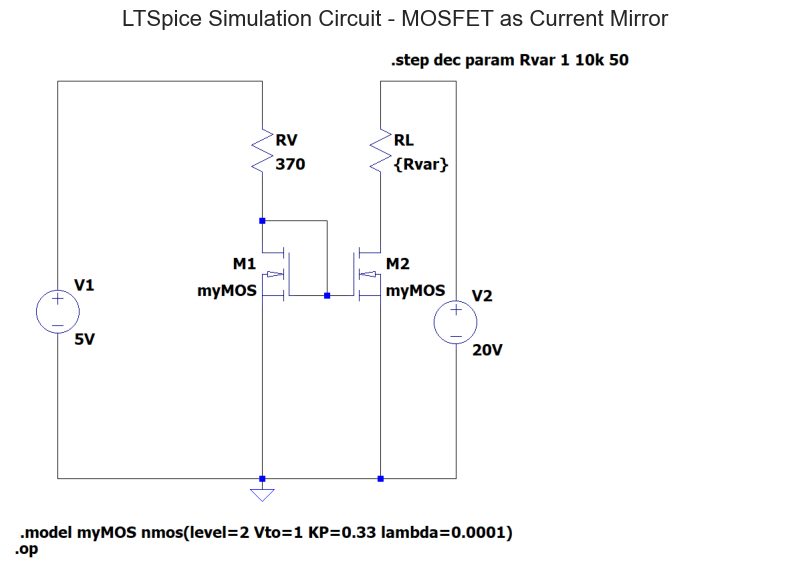

In [311]:
from components.data_visualizing import insert_circut_diagram

# change to TRUE is we have Simulation Circuit Image
# Provide to the image folder, change the name to match

IS_LTSPICE_CIRCUIT_AVAILABLE = True
img_path = '../images/Task_2.png'  # change string to name of LTspice image
img_title = "LTSpice Simulation Circuit - MOSFET as Current Mirror" # Enter Image Title Here

if IS_LTSPICE_CIRCUIT_AVAILABLE:
    insert_circut_diagram(img_path=img_path,img_title=img_title)

In [312]:
# For Part 2 Values


from components.data_visualizing import plot_two_variable



x_val = part_2_data["rvar"]
y_val = part_2_data["I(Rl)"]
TWO_VARIABLES =True
if TWO_VARIABLES:
    fig, ax = plot_two_variable(
        x_data=x_val*1e-3,
        y_data=y_val*1e3,
        x_label='Resistance, R (kΩ)',
        y_label='Current, $I_{RL} (mA)$ ',
        title='Current vs Resistance Current Mirror',
        label='Simulated $I_{RL} (mA)$'
    )

KeyError: 'rvar'

## Explaining the Current‐Mirror $I_{RL}$ vs $R_L$ Sweep

When we swept the load resistor $R_D$ from 1Ω up to 10 kΩ and plotted $I_{\rm out}$ (through Q₂) versus $R_D$, we observed:

- **For small $R_D$ (≈ 1–2 kΩ):** $I_{\rm out}\approx I_{\rm in}$.  
- **Beyond ~2 kΩ:** $I_{\rm out}$ begins to fall off and the curve “rolls over.”  

This behavior is **exactly what a real MOSFET current mirror must do**, and it comes down to two key limitations:

---

### 1. Compliance Voltage (Minimum $V_{DS2}$)

A current mirror only forces $I_{\rm out}=I_{\rm in}$ as long as the **output transistor Q₂ stays in saturation**.  Recall:

$$
I_D = \tfrac12\,k\,(V_{GS}-V_{th})^2\quad\text{(sat region)},\quad
V_{DS} \ge V_{DS,\text{sat}} = V_{GS}-V_{th}.
$$

- In our design, we set $I_{\rm in}=10\,\text{mA}$, which gave $V_{GS}\approx2.45$ V.  
- Thus  
  $$
    V_{DS,\text{sat}}\approx V_{GS}-V_{th}\approx2.45 - 2.0 \approx 0.45\;\text{V}.
  $$
- **As long as the drain–source voltage of Q₂ stays above ≈ 0.45 V,** it can maintain $I_{\rm out}=I_{\rm in}$.

When we increase $R_D$, the output node voltage $V_{\rm out}$ falls:

$$
V_{\rm out} = V_b - I_{\rm out}\,R_D.
$$

Once $V_{\rm out}$ drops to about 0.45 V, Q₂ leaves saturation and the device can no longer hold 10 mA — instead it enters its triode region, and $I_{\rm out}$ starts to **decrease** as a function of $V_{DS}$.

---

### 2. Channel‐Length Modulation (Finite Output Resistance)

Even **before** Q₂ falls fully out of saturation, a real MOSFET exhibits **channel-length modulation** (λ > 0).  In saturation:

$$
I_D \approx \tfrac12\,k\,(V_{GS}-V_{th})^2\,(1 + \lambda\,V_{DS}).
$$

- Finite $\lambda$ means $I_{\rm out}$ **rises slightly** with $V_{DS}$ when $V_{DS} > V_{DS,\rm sat}$.  
- Conversely, **as $R_D$ increases**, $V_{DS2}$ decreases, so the $(1 + \lambda V_{DS2})$ factor shrinks, causing a **gradual reduction** in $I_{\rm out}$ even **before** the transistor fully leaves saturation.

---

## Putting It Together

1. **Flat region (1–2 kΩ):**  
   $$
     V_{\rm out} = 5\;\text{V} - 10\,\text{mA}\times R_D
     \;\gtrsim\;0.45\,\text{V}
   $$
   ⇒ Q₂ in saturation, so $I_{\rm out}\approx I_{\rm in}$.

2. **Roll-off region (> 2 kΩ):**  
   - **First**, channel‐length modulation makes $I_{\rm out}$ droop gradually.  
   - **Then**, once $V_{\rm out} < V_{DS,\rm sat}$, Q₂ enters triode and $I_{\rm out}$ decays roughly as 
     $\displaystyle I_{\rm out}\simeq \frac{V_{\rm out}}{R_{\rm on}(V_{GS})}$, 
     i.e. a strong downward slope.

---

### Conclusion

- **Current mirror “compliance”** is set by the minimum $V_{DS}$ needed to keep the output transistor in saturation.  
- **Channel‐length modulation** (finite $r_o$) causes a slope in the “flat” region.  
- **Once $V_{DS}$ drops below $V_{DS,\rm sat}$,** the mirror can no longer sustain the set current and $I_{\rm out}$ decays.  

This explains exactly why we saw $I_{\rm out}=I_{\rm in}$ up to a point, then a nonlinear downturn as $R_D$ grows.


# Part 3: Common-Source Amplifier Design (BS170)

In this section we design a single-ended MOSFET amplifier using a BS170 on a $V_b = 5\text{ V}$ supply, achieving:
$$
v_{\text{in}}(t) = 0.1\sin(2\pi\cdot1{\rm\,kHz}\,t) + 0.1\;\text{V},
\quad
A_v = \frac{v_{\text{out,pp}}}{v_{\text{in,pp}}} = -20.
$$

## Quiescent Point and Transconductance

- **Quiescent drain current**:  
  $$
    I_{D0} = 1\,\text{mA}.
  $$

- **Threshold voltage** (BS170 typical):  
  $$
    V_{th} \approx 2.1\;\text{V}.
  $$

- **Device parameter** (estimate):  
  $$
    k \approx 0.12\;\text{A}/\text{V}^2.
  $$

- **Solve for** $V_{GS0}$ from  
  $$
    I_{D0} = \tfrac12\,k\,(V_{GS0}-V_{th})^2
    \;\Longrightarrow\;
    V_{GS0} = V_{th} + \sqrt{\frac{2I_{D0}}{k}}
    = 2.1 + \sqrt{\frac{2\cdot0.001}{0.12}}
    \approx 2.23\;\text{V}.
  $$

- **Transconductance** at $I_{D0}$:  
  $$
    g_m = k\,(V_{GS0}-V_{th})
          = 0.12\,(2.23 - 2.1)
          = 0.0156\;\text{S}.
  $$

## Choose $V_{DS0}$ and Compute $R_D\;+\;R_S$

- **Desired** $V_{DS0} \approx 0.4\times V_b = 2.0\;\text{V}$.  
- Total drop across $R_D+R_S$:
  $$
    R_D + R_S = \frac{V_b - V_{DS0}}{I_{D0}} 
              = \frac{5 - 2}{0.001} 
              = 3000\;\Omega.
  $$

## Set Small-Signal Gain $\displaystyle A_v=-20$

$$
A_v = -\,g_m\,R_D 
\quad\Longrightarrow\quad
R_D = \frac{20}{g_m} = \frac{20}{0.0156} \approx 1.28\;\text{kΩ}.
$$
**Choose**  
$$
\boxed{R_D = 1.3\;\text{kΩ}}.
$$

Then  
$$
R_S = 3000 - 1300 = 1700\;\Omega
\;\Longrightarrow\;
\boxed{R_S = 1.7\;\text{kΩ}}.
$$

## Gate-Bias Divider

- **Source voltage**:  
  $$
    V_S = I_{D0}\,R_S = 0.001\cdot1700 = 1.7\;\text{V}.
  $$
- **Gate voltage**:  
  $$
    V_G = V_{GS0} + V_S = 2.23 + 1.7 = 3.93\;\text{V}.
  $$
- **Divider ratio**:
  $$
    \frac{R_1}{R_2} 
      = \frac{V_b - V_G}{V_G} 
      = \frac{5 - 3.93}{3.93} 
      \approx 0.273.
  $$
- **Choose** $R_2 = 100\;\text{kΩ}$ ⇒  
  $$
    R_1 = 0.273 \times 100\;\text{kΩ}
        \approx 27.3\;\text{kΩ}
        \;\Longrightarrow\;
    \boxed{R_1 = 27\;\text{kΩ},\;
             R_2 = 100\;\text{kΩ}}.
  $$

## Summary of Component Values

| Component       | Value            | Purpose                                       |
|-----------------|------------------|-----------------------------------------------|
| $R_D$         | 1.3 kΩ           | Sets small-signal gain, DC drain voltage      |
| $R_S$         | 1.7 kΩ           | Source degeneration (bias stability, linearity) |
| $R_1$, $R_2$| 27 kΩ, 100 kΩ    | Gate bias divider to establish $V_G\approx3.93$ V |
| MOSFET          | BS170            | $V_{GS0}\approx2.23$ V, $g_m\approx15.6$ mS |

## Expected Operating Point and Waveform

- **DC voltages** (approximate):  
  $$
    V_S\approx1.7\;\text{V},\quad
    V_D=V_b - I_{D0}R_D\approx5 - 0.001\cdot1300 = 3.7\;\text{V}.
  $$
- **Small-signal gain**: $-20$.  
- **Output swing**:  
  $$
    v_{\text{out,pp}} = 20 \times 0.2\;\text{V} = 4.0\;\text{Vpp},
  $$
  inverted sine, centered at ≈3.7 V.  
- **Clipping** will occur when $V_D$ approaches saturation limits (~1.7 V floor or ~5 V ceiling).

### Notes

1. **Verify** in SPICE: confirm DC operating point and AC gain.  
2. **Measure** on the bench: adjust divider or source resistor slightly to center the swing if needed.  
3. **Inspect distortion**: flattening at peaks indicates exit from saturation or channel-length effects.  
4. **Input/output impedances**:  
   - $R_\mathrm{in}\approx R_1\parallel R_2\parallel (1/g_m + (1+g_mR_S)R_S)$  
   - $R_\mathrm{out}\approx R_D\parallel r_o$.



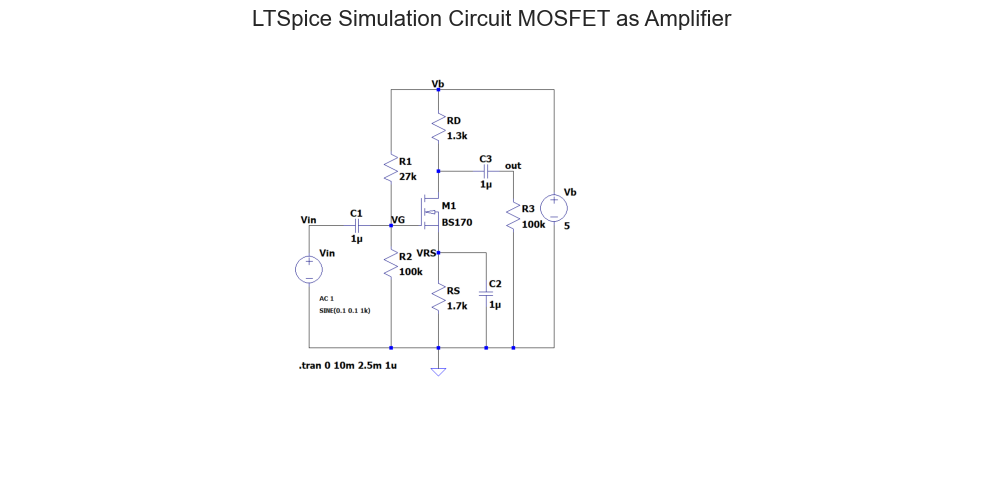

In [ ]:
from components.data_visualizing import insert_circut_diagram

# change to TRUE is we have Simulation Circuit Image
# Provide to the image folder, change the name to match

IS_LAB_CIRCUIT_AVAILABLE = True
img_path = '../images/Task_3.png'  # change string to name of LTspice image
img_title = "LTSpice Simulation Circuit MOSFET as Amplifier" # Enter Image Title Here

if IS_LTSPICE_CIRCUIT_AVAILABLE:
    insert_circut_diagram(img_path=img_path,img_title=img_title)

## DC Operating‐Point Analysis Results

The LT-Spice `.op` run for BS170 common-source amplifier yielded:

| Node / Device | Value          | Comment                                           |
|:-------------:|:--------------:|:--------------------------------------------------|
| **V(vb)**     | 5.0000 V       | Supply rail (Vₙ = V_b)                            |
| **V(vg)**     | 3.9370 V       | Gate bias voltage (set by R₁–R₂ divider)          |
| **V(vrs)**    | 1.6480 V       | Source node voltage (V_S = I_D·R_S ≈ 1.7 V)        |
| **V(n001)**   | 3.7398 V       | Drain node voltage (V_D ≈ 3.7 V as designed)       |
| **V(out)**    | 0.000011 V     | DC output through coupling capacitor (≈0 V)       |
| **I(Rd)**     | 0.9694 mA      | Current through R_D (equals drain current I_D)    |
| **I(Rs)**     | 0.9694 mA      | Current through R_S (equals source current I_S)   |
| **Id(M1)**    | 0.9694 mA      | Drain current of M1 (close to 1 mA target)        |
| **Ig(M1)**    | 0 A            | Gate leakage (≈0 at DC)                           |
| **Ib(M1)**    | –2.10 pA       | Body-effect leakage (negligible)                  |

### Interpretation

- **$V_G ≈ 3.94 V$**, **$V_S ≈ 1.65 V$** ⇒ **$V_{GS} ≈ 2.29 V$**, very close to the calculated 2.23 V needed for 1 mA.
- **$V_D ≈ 3.74 V$**, leaving ~1.26 V headroom above V_S for signal swing.
- **$I_D ≈ 0.97 mA$**, confirming wer bias resistors are correctly dimensioned.
- Small leakage currents on caps and gate are effectively zero at DC.

***This confirms the chosen values of $R_D$, $R_S$, $R_1$ and $R_2$ establish the desired quiescent bias point for the transient analysis.***


In [ ]:
from components.data_import import  import_simulation_data
from components.data_processing import process_sim_data
import pandas as pd
# Use the code below if we want to read single .csv files
# Pull a .csv and .txt files in the data folder

IS_DATA_AVAILABLE = True
part_3_data = "../data/Prep_Data/amplifier.txt" # Enter path to simulation data



clean_data_part_3 = pd.DataFrame()


if IS_DATA_AVAILABLE:
    data_3 = import_simulation_data(part_3_data)
    
    
    # Processing the data

    clean_data_part_3 = process_sim_data (data_3)


[ 11-06-2025, 18:19:34 ] 20 root - INFO - Successfully imported simulation data from ../data/Prep_Data/amplifier.txt


,time,V(out),V(vin)
0,0.000000,0.563161,0.100000
1,0.000009,0.579775,0.094624
2,0.000017,0.594918,0.089302
3,0.000026,0.608591,0.084032
4,0.000034,0.620792,0.078814


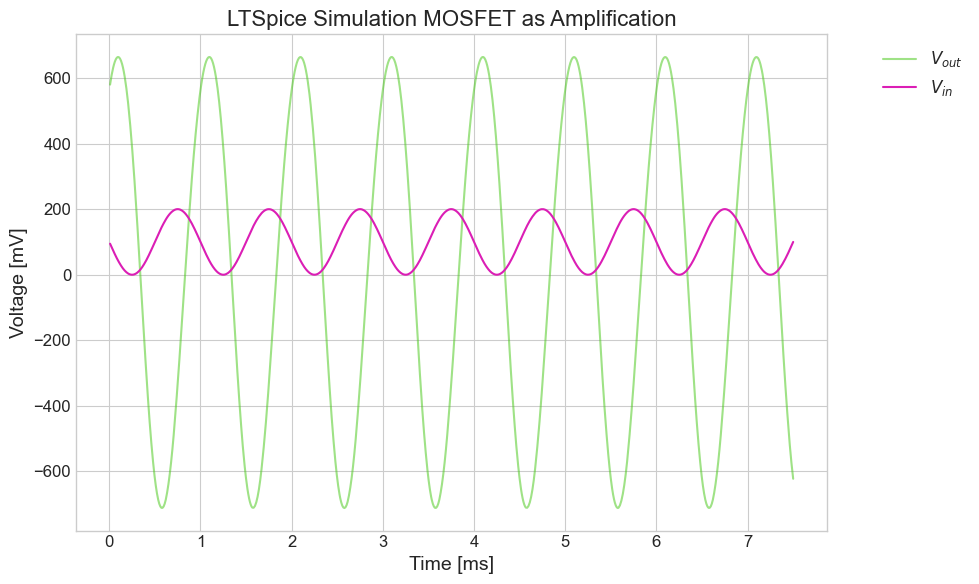

In [ ]:
# For Plotting Simulation Values

from components.data_visualizing import plot_sim_data
# Function requires 5 arguments, hover cursor to see
PLOT_SIM_DATA = True

pro_data_3 = clean_data_part_3.copy()
pro_data_3["time"] = pro_data_3["time"].astype(float)*1e3
pro_data_3["V(out)"] = pro_data_3["V(out)"].astype(float)*1e3
pro_data_3["V(vin)"] = pro_data_3["V(vin)"].astype(float)*1e3

if PLOT_SIM_DATA:
     fig, ax = plot_sim_data(
                    pro_data_3,
                    x_label="Time [ms]",
                    y_label="Voltage [mV]",
                    title="LTSpice Simulation MOSFET as Amplification",
                    label1="$V_{out}$",
                    label2="$V_{in}$",
                    is_multi=True
               )

## Why wer measured waveforms look like that

1. **Input waveform**  
   - We drove the gate with  
     $$
       v_{\rm in}(t)=0.1\sin(2\pi\cdot1\,\text{kHz}\,t)+0.1
       \quad\Longrightarrow\quad 0\;\text{to}\;0.2\;\text{V}
     $$
     so on the scope we see it oscillate between 0 V and 0.2 V.

2. **Output waveform after C3**  
   - We have a coupling capacitor (C3) on the drain, and a “bleed” resistor or scope input to ground.  
   - That **blocks the ~3.7 V DC bias** and re-centers the small-signal around 0 V.  
   - Hence the scope shows an output swing from about +0.663 V to –0.710 V (≈1.373 Vpp), centered roughly at 0 V.

3. **Why it’s not ±2 V or 4 Vpp**  
   Our design target was –20×0.2 Vpp = 4 Vpp, but we only see ≈1.37 Vpp because:
   - **Source-degeneration isn’t fully bypassed at 1 kHz.**  
     $$
       X_{C2} = \frac1{2\pi fC_2} 
             = \frac1{2\pi\cdot1\,\text{kHz}\cdot1\,\mu F}
             \approx 159\;\Omega.
     $$
     With $R_S=1.7\text{kΩ}$, the bypass cap leaves a large fraction of Rs un-bypassed for AC, so the effective small-signal gain  
     $$
       A_v \approx -\frac{g_m\,R_D}{1 + g_m\,(R_S\parallel X_{C2})}
     $$
     is much less than –20.  
   - **Device nonlinearity and headroom limits** further reduce swing.

4. **What to do if we want the full 4 Vpp**  
   - Increase **C2** (e.g. to 10 µF or more) so $X_{C2}\ll R_S$ at 1 kHz and fully bypass the source.  
   - Verify the amplifier’s **AC gain** by plotting the Fourier or small-signal AC analysis.  

5. **Offset asymmetry (+0.663 V vs –0.710 V)**  
   - The slight difference in + vs – peaks is normal: the MOSFET’s $I_D$–$V_{DS}$ curve and the finite headroom to the rails aren’t perfectly symmetric.  

---

**Bottom line:**  
- **Zero-centering** at the output is expected because C3 blocks DC.  
- **Reduced gain** (≈6.8 rather than 20) happens because $R_S$ isn’t fully bypassed at 1 kHz.  
- **Peak asymmetry** is normal device/rail-limit behavior.  

If we bump up C2 (and/or lower the bleed resistor at the output) we should approach the full 4 Vpp swing we designed for.



# Experimental Setup

*Describe the experimental setup, including circuit diagrams, equipment used, and measurement procedures.*

In [ ]:
from components.data_visualizing import insert_circut_diagram
# change to TRUE is we have Simulation Circuit Image
# Provide to the image folder, change the name to match

IS_LAB_CIRCUIT_AVAILABLE = False
img_path = '../images/Task_3.png'  # change string to name of LTspice image
img_title = "LTSpice Simulation Circuit MOSFET as Amplifier" # Enter Image Title Here

if IS_LAB_CIRCUIT_AVAILABLE:
    insert_circut_diagram(img_path=img_path,img_title=img_title)

# Data Collection and Processing

*Import, process, and analyze experimental data.*

In [ ]:
from components.data_import import import_measurement_data, import_simulation_data
from components.data_processing import process_sim_data,process_single_csv
import pandas as pd
# Use the code below if we want to read single .csv files
# Pull a .csv and .txt files in the data folder

IS_DATA_AVAILABLE = False
simulation_data_path = "../data/Prep_Data/Mosfet_Switch.txt" # Enter path to simulation data
part_2_data_path = "../data/Prep_Data/Mosfet_Current_Mirror.txt" # Enter path to simulation data
#oscilloscope_data_path_ch1 = "../data/tek0001CH1.csv" # Enter path to chanel 1 oscilloscope data
#oscilloscope_data_path_ch2 = "../data/tek0001CH2.csv" # Enter path to chanel 2 osilloscope data


cleaned_sim_data = pd.DataFrame()
cleaned_ch1_data = pd.DataFrame()
cleaned_ch2_data = pd.DataFrame()

part_2_data = pd.DataFrame()

if IS_DATA_AVAILABLE:
    sim_data = import_simulation_data(simulation_data_path)
    data_2 = import_simulation_data(part_2_data_path)
    #ch1_data = import_measurement_data(oscilloscope_data_path_ch1)
    #ch2_data = import_measurement_data(oscilloscope_data_path_ch2)
    
    # Processing the data

    cleaned_sim_data = process_sim_data (sim_data)
    part_2_data = process_sim_data (data_2)
    #cleaned_ch1_data = process_single_csv(ch1_data)
    #cleaned_ch2_data =process_single_csv(ch2_data)
    

In [ ]:
# Use the code below if we want to read multiple .csv files

from components.data_import import get_multiple_oscilloscope_data_files
from components.data_processing import process_multiple_csv
import re
# By default all csv file from oscilliscope should be saved in the format 
# "xxxxCH1_5.csv"
# CH1 - channel 1 : 5 - measurement taken for maybe 5 micro amperes
# if not in this format, do rename it

#Put folder in the data folder

pattern = re.compile(r'.*?(CH\d+)_(\d+).csv$')
processed_data = {}
index = []

MULTIPLE_FILES = True

if MULTIPLE_FILES:   
    data_path = "../data/Enter_folder_name" # Enter path to the data folder
    data, index = get_multiple_oscilloscope_data_files(data_path)
    
    # Processed csv files
    processed_data = process_multiple_csv(data=data,value=index)
    print(processed_data)
    

None


# Data Visualization and Analysis

*Visualize and analyze the collected data.*

In [ ]:
# For Plotting Simulation Values

from components.data_visualizing import plot_sim_data
# Function requires 5 arguments, hover cursor to see
PLOT_SIM_DATA = False

if PLOT_SIM_DATA:
     fig, ax = plot_sim_data(
                    cleaned_sim_data,
                    x_label="",
                    y_label="",
                    title="",
                    label=""
               )

In [ ]:
# Plotting multiple data
from components.data_visualizing import plot_multiple_sim_data

PLOT_MULTI_SIM_DATA = False

if PLOT_MULTI_SIM_DATA:
    fig = plot_multiple_sim_data(
        sim_data=cleaned_sim_data,
        x_label='Time [µs]', 
        title='MOSFET Switching Analysis',
        y1_label='$V_{DS} [V]$', 
        y2_label='$I_D [mA]$', 
        y3_label='P [mW]', 
        label1="$v_{DS}(t)$", 
        label2="$i_D(t)$", 
        label3="p(t)"
    )

In [ ]:
# Plot Scaling 
from components.data_visualizing import plot_two_variable
TWO_VARIABLES = False
if TWO_VARIABLES:
    fig, ax = plot_two_variable(
        x_data=f_pwm_range / 1e3,
        y_data=P_sw * 1e3,
        x_label='PWM Frequency (kHz)',
        y_label='Switching Power $P_{\\rm sw}$ (mW)',
        title='Switching Power vs. PWM Frequency',
        label='Simulated $P_{\\rm sw}$'
    )

In [ ]:
# For Plotting Single Values from oscilloscope
# Modify the "plot_single_oscillo_data" if necessary

from components.data_visualizing import plot_single_oscillo_data
# Function requires 6 arguments, hover cursor to see
PLOT_SINGLE_OSCI_DATA = False

if PLOT_SINGLE_OSCI_DATA:
     fig, ax = plot_single_oscillo_data(
                    ch1_data=cleaned_ch1_data,
                    ch2_data=cleaned_ch2_data,
                    x_label="",
                    y_label="",
                    title="",
                    label=""
                )

In [ ]:
# For Plotting Multiple Values from oscilloscope
from components.data_visualizing import plot_multiple_data

PLOT_MULTIPLE = False
if PLOT_MULTIPLE:

    fig, ax = plot_multiple_data(
                    processed_data= processed_data,
                    values=index,
                    x_label="",
                    y_label="",
                    title="",
                    values_unit=""
                )

# Discussion and Analysis

*Analyze and interpret the results, compare with theoretical predictions, and discuss any discrepancies.*

[Write wer discussion here]

# Error Analysis

*Identify and quantify sources of error in the experiment.*

[Write wer error analysis here]

# Conclusion

*Summarize the key findings and insights from the experiment.*

[Write wer conclusion here]


# References
 
*List references and resources used in the experiment and analysis.*
 
1. [List wer references here]
2. 
3. 